## EDA

**Approach:**
- Overall stats
- Sleep
- Health conditions
- Age
- Income/working hours
- Night workers
- Naps 
    
**Initial Results**
- Participants average 6.7 hours of sleep per night (.3 below the recommended value)
- Participants are averaging more hours than what is considered a normal work week (45 vs 40).
- Amount of time spent working and acid reflux are the biggest causes of poor sleep.
- The most common awake times are between 6:00am and 6:15am. This is as expected.
- Aside from high blood pressure all percentages of observed health conditions are higher in those who are not getting adequate  sleep. The recurring trend is that heartburn is the worst offender, with an increase from 6% (for those getting < 7 hours of sleep) to 11% (for those getting > 7 hours of sleep).
- No correlation between age and amount of sleep.
- Participants making under 15,000 annually are more likely to have health conditions and poor sleep. They are also more likely to be treated for depression, anxiety and diabetes.

**Outliers:**  
- A few participants average under 3 hours of sleep per night. 

**Impuation**
- Non-answers (refused/don't know) were imputed with either the mean or the mode. 
- length_of_naps had nans as those participants did not take naps. This were given a value of 0.  

**Next steps:**
- Based on the EDA, sleep-based features should be able predict presence of a health condition.

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('./datasets/sleep_EDA.csv', index_col = [0])

In [3]:
df.isnull().sum()

awake_time                           0
start_work                           0
end_work                             0
bed_time_work_tomorrow               0
no_work_awake_time                   0
bed_time_no_work_tomorrow            0
usual_sleep_per_night                0
naps_per_month                       0
length_of_average_nap                0
employment_status                    0
avg_weekly_hours_worked              0
snores                               0
treated_for_heart_disease            0
treated_for_high_blood_pressure      0
treated_for_diabetes                 0
treated_for_heartburn_GERD           0
treated_for_arthritis                0
treated_for_depression               0
treated_for_anxiety                  0
age                                  0
marital_status                       3
highest_edu                          0
single_dual_household                0
house_hold_income_bracket          301
unconvential_awake_time              0
poor_sleep               

## Preliminary Stats

In [4]:
df.describe()

,usual_sleep_per_night,naps_per_month,length_of_average_nap,employment_status,avg_weekly_hours_worked,snores,treated_for_heart_disease,treated_for_high_blood_pressure,treated_for_diabetes,treated_for_heartburn_GERD,treated_for_arthritis,treated_for_depression,treated_for_anxiety,age,unconvential_awake_time,poor_sleep,has_condition,overworked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,6.655158,3.494000,31.717000,2.006000,44.918000,2.144000,0.053000,0.218000,0.067000,0.085000,0.078000,0.068000,0.045000,47.232416,0.13900,0.476000,0.370000,0.443000
std,1.149458,6.384099,42.802371,0.368917,10.351446,2.027159,0.224146,0.413094,0.250147,0.279021,0.268306,0.251872,0.207408,11.773514,0.34612,0.499674,0.483046,0.496989
min,1.000000,0.000000,0.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.00000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.00000,0.000000,0.000000,0.000000
50%,7.000000,1.000000,15.000000,2.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.00000,0.000000,0.000000,0.000000
75%,7.500000,4.000000,60.000000,2.000000,50.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.00000,1.000000,1.000000,1.000000
max,11.000000,31.000000,360.000000,3.000000,96.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,1.00000,1.000000,1.000000,1.000000


**Percentage of observations treated for specific health conditions:**
- Heart Disease: 5.3%
- High Blood Pressure: 2.1%
- Diabetes: 6.7%
- Heartburn/GERD: 8.5%
- Arthritis: 7.8%
- Depression: 6.8%
- Anxiety: 4.5%

**Ages**

- Ages range from 18 to 91 with the majority being 40+

**Amount of Sleep**

- Participants average 6.7 hours of sleep per night (.3 below the recommended value).

**Work**

- Participants are averaging more hours than what is considered a normal work week (45 vs 40).

## Sleep

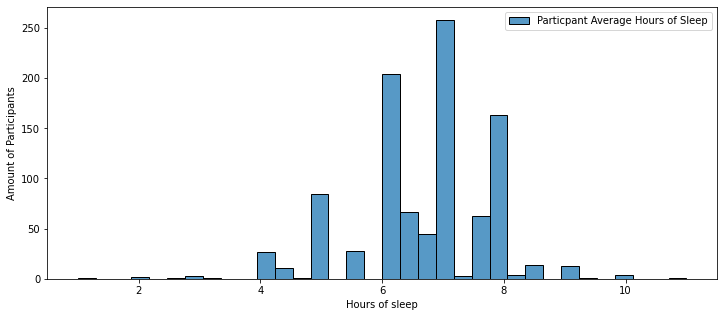

In [33]:
# Distribution of average hours of sleep in the dataset. 
plt.figure(figsize = (12, 5))
sns.histplot(df.usual_sleep_per_night)

plt.ylabel('Amount of Participants')
plt.xlabel('Hours of sleep')
plt.legend(labels = ['Particpant Average Hours of Sleep']);

Average sleep hours among participants follows a normal distribution with most averaging between the 6- and 8-hour range.

**Outliers**

In [6]:
df[df['usual_sleep_per_night'] < 4]

,awake_time,start_work,end_work,bed_time_work_tomorrow,no_work_awake_time,bed_time_no_work_tomorrow,usual_sleep_per_night,naps_per_month,length_of_average_nap,employment_status,...,treated_for_anxiety,age,marital_status,highest_edu,single_dual_household,house_hold_income_bracket,unconvential_awake_time,poor_sleep,has_condition,overworked
143,12:00 AM,12:00 AM,7:15 AM – 7:29 AM,6:45 AM – 6:59 AM,7:00 AM – 7:14 AM,5:15 AM – 5:29 AM,3.333,0,0.0,2,...,0,55.0,Married_partnered,Graduated high school,Dual income,NaN,1,1,1,1
288,6:00 AM – 6:14 AM,10:00 AM – 10:59 AM,6:00 AM – 6:14 AM,6:45 AM – 6:59 AM,10:00 AM – 10:59 AM,8:45 AM – 8:59 AM,2.500,0,0.0,3,...,0,66.0,Separated,Some high school,Single income,"Under $15,000",0,1,1,0
305,7:00 AM – 7:14 AM,8:00 AM – 8:14 AM,6:30 AM – 6:44 AM,8:30 AM – 8:44 AM,8:00 AM – 8:14 AM,8:45 AM – 8:59 AM,2.000,0,0.0,1,...,0,54.0,Married_partnered,Some college,Single income,NaN,0,1,0,0
444,5:00 AM – 5:14 AM,7:00 AM – 7:14 AM,6:15 AM – 6:29 AM,9:15 AM – 9:29 AM,6:00 AM – 6:14 AM,5:15 AM – 5:29 AM,3.000,10,30.0,2,...,0,46.0,Married_partnered,Vocational/Tech school,Dual income,"$50,001 - $75,000",0,1,0,0
650,12:01 AM – 4:59 AM,5:30 AM – 5:44 AM,6:00 AM – 6:14 AM,8:45 AM – 8:59 AM,12:01 AM – 4:59 AM,8:45 AM – 8:59 AM,1.000,6,60.0,2,...,0,49.0,Married_partnered,Vocational/Tech school,Single income,"$50,001 - $75,000",1,1,0,0
651,5:30 AM – 5:44 AM,7:00 AM – 7:14 AM,6:45 AM – 6:59 AM,7:45 AM – 7:59 AM,5:30 AM – 5:44 AM,5:15 AM – 5:29 AM,2.000,0,0.0,2,...,0,37.0,Single,Graduated high school,Single income,"$35,001 - $50,000",0,1,0,1
744,5:30 AM – 5:44 AM,6:30 AM – 6:44 AM,8:00 AM – 8:14 AM,7:45 AM – 7:59 AM,5:30 AM – 5:44 AM,7:45 AM – 7:59 AM,3.000,0,0.0,2,...,0,55.0,Married_partnered,Graduated high school,Dual income,"$50,001 - $75,000",0,1,0,1
898,6:00 AM – 6:14 AM,12:01 AM – 4:59 AM,6:00 AM – 6:14 AM,7:45 AM – 7:59 AM,12:01 AM – 4:59 AM,8:45 AM – 8:59 AM,3.000,3,20.0,2,...,0,59.0,Married_partnered,Graduated high school,Single income,"$15,000 - $25,000",0,1,1,1


Participants averaging under 4 hours of sleep per night

**Awake Times**

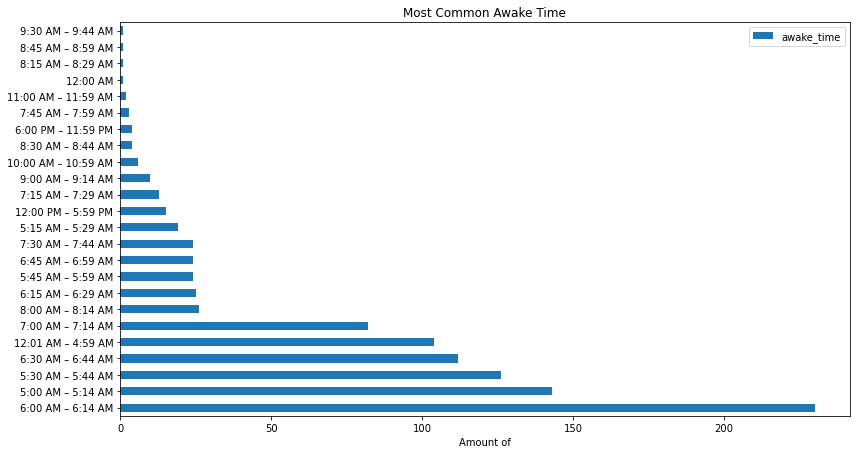

In [7]:
# Most common awake times for those with each health condition
plt.figure(figsize = (12, 6))
df['awake_time'].value_counts().plot(kind = 'barh')
plt.tight_layout()
plt.title('Most Common Awake Time')
plt.xlabel('Amount of')
plt.legend();

- The most common awake times are between 6:00am and 6:15am. This is as expected.

**Correlations between numerical features and having poor sleep**

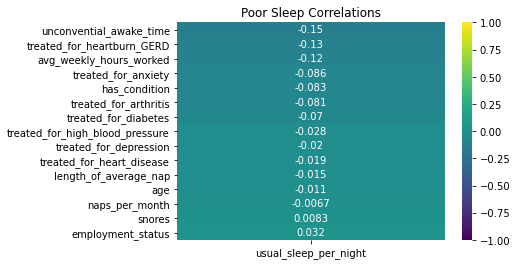

In [8]:
sns.heatmap(df.drop(columns = 'poor_sleep').corr()[['usual_sleep_per_night']][1:-1].sort_values('usual_sleep_per_night', ascending = True),
                                                  vmin = -1, 
                                                  vmax = 1, 
                                                  annot = True,
                                                  cmap = 'viridis')
plt.title('Poor Sleep Correlations');

- Heartburn and work hours per week have the strongest postive correalation with poor sleep. 

**Naps**

In [9]:
df[df['naps_per_month'] != 0].shape[0] 

538

In [10]:
df.shape[0]

1000

53% percent of participants take more than one nap per month.

<Figure size 864x432 with 0 Axes>

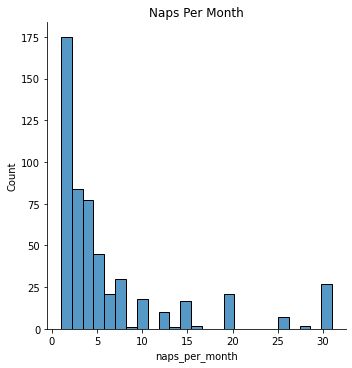

In [40]:
plt.figure(figsize = (12,6))
sns.displot(df[df['naps_per_month'] != 0]['naps_per_month'])
plt.title('Naps Per Month');

In [12]:
'Average nap duration:',  round(df[df['naps_per_month'] < 1]['length_of_average_nap'].mean(),2)

('Average nap duration:', 0.52)

Participants that nap do so for about an hour. Napping distributions are positivly skewed with the execption of the number of participants who nap 30+ times a month. Excessive napping can be linked to underlying conditions. We will explore these entries further.

In [13]:
for i in [x for x in df.columns if x[:len('treated_for_')] in 'treated_for_']:
    try:
        print(f'Overall Percentage - {i[12:].title()}: {df[i].value_counts(normalize = True)[1]}')
        print(f'Percentage in those who nap daily - {i[12:].title()}: {round(df[df["naps_per_month"] > 29][i].value_counts(normalize = True)[1],2)} \n')
    except:
        print(f'{i[12:].title()}: no cases')

Overall Percentage - Heart_Disease: 0.053
Percentage in those who nap daily - Heart_Disease: 0.26 

Overall Percentage - High_Blood_Pressure: 0.218
Percentage in those who nap daily - High_Blood_Pressure: 0.44 

Overall Percentage - Diabetes: 0.067
Percentage in those who nap daily - Diabetes: 0.22 

Overall Percentage - Heartburn_Gerd: 0.085
Percentage in those who nap daily - Heartburn_Gerd: 0.11 

Overall Percentage - Arthritis: 0.078
Percentage in those who nap daily - Arthritis: 0.15 

Overall Percentage - Depression: 0.068
Percentage in those who nap daily - Depression: 0.22 

Overall Percentage - Anxiety: 0.045
Anxiety: no cases


In [14]:
df[df['naps_per_month'] > 29]['has_condition'].mean()

0.6296296296296297

In [15]:
df['has_condition'].mean()

0.37

Aside from anxiety all, those nap 30+ times a month have substantially higher rates of health conditons. The true percentages are most likely lower. Those who nap daily make up a small percetange of the data set and ever occurence of a condition would be a overvalued. 

## Health Conditions

**Health Conditions of participants**

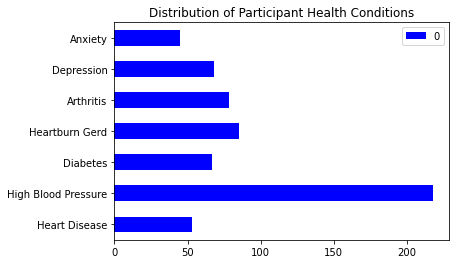

In [16]:
# Average amount of sleep for those with each health condition.
treated = [x for x in df.columns if x[:7] == 'treated']
treated_sums = [df[x].sum() for x in df[treated].columns]
hc_counts = pd.DataFrame(treated_sums, index = [x[12:].title().replace('_', ' ') for x in treated]);
hc_counts.plot(kind = 'barh', title = 'Distribution of Participant Health Conditions', color = ['blue',
                                                                                              'green',
                                                                                              'yellow',
                                                                                              'red',
                                                                                              'pink',
                                                                                              'orange']);

Our participants suffered the most from High Blood Pressure. 

**Percentages of health conditions by whether or not the participant is getting adequate sleep**

In [17]:
df.drop(columns = ['age', 
                   'usual_sleep_per_night',
                   'employment_status',
                   'avg_weekly_hours_worked',
                   'naps_per_month',
                   'has_condition',
                   'length_of_average_nap',
                   'snores',
                   'unconvential_awake_time']).groupby('poor_sleep').mean().T

poor_sleep,0,1
treated_for_heart_disease,0.049618,0.056723
treated_for_high_blood_pressure,0.221374,0.214286
treated_for_diabetes,0.059160,0.075630
treated_for_heartburn_GERD,0.059160,0.113445
treated_for_arthritis,0.061069,0.096639
treated_for_depression,0.062977,0.073529
treated_for_anxiety,0.032443,0.058824
overworked,0.423664,0.464286


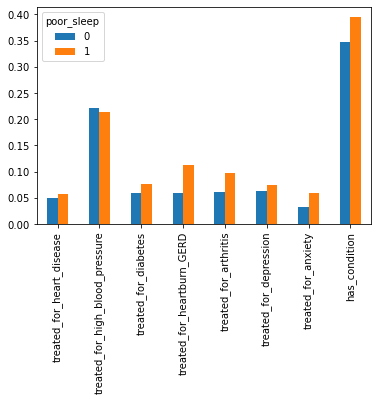

In [18]:
df.drop(columns = ['age',
                   'naps_per_month',
                   'length_of_average_nap',
                   'usual_sleep_per_night',
                   'employment_status',
                   'avg_weekly_hours_worked',
                   'snores',
                   'unconvential_awake_time',
                   'overworked']).groupby('poor_sleep').mean().T.plot(kind='bar');

- Aside from high blood pressure, all percentages observed that health conditions are higher in those who are not getting adequate sleep. The recurring trend is that heartburn is the worst offender, with an increase from 6% (for those getting < 7 hours of sleep) to 11% (for those getting > 7 hours of sleep).

## Late Workers

In [19]:
df['start_work'].value_counts()

8:00 AM – 8:14 AM      216
7:00 AM – 7:14 AM      158
7:30 AM – 7:44 AM      132
8:30 AM – 8:44 AM       79
9:00 AM – 9:14 AM       73
6:00 AM – 6:14 AM       70
6:30 AM – 6:44 AM       59
12:00 PM – 5:59 PM      31
7:45 AM – 7:59 AM       23
10:00 AM – 10:59 AM     22
12:01 AM – 4:59 AM      19
6:00 PM – 11:59 PM      17
9:30 AM – 9:44 AM       16
5:30 AM – 5:44 AM       13
7:15 AM – 7:29 AM       12
8:15 AM – 8:29 AM       11
5:00 AM – 5:14 AM       10
8:45 AM – 8:59 AM        8
6:45 AM – 6:59 AM        6
11:00 AM – 11:59 AM      6
6:15 AM – 6:29 AM        5
9:15 AM – 9:29 AM        5
5:45 AM – 5:59 AM        3
12:00 AM                 3
5:15 AM – 5:29 AM        2
9:45 AM – 9:59 AM        1
Name: start_work, dtype: int64

In [20]:
late_work = df[df['start_work'].str.contains('PM')] + df[df['start_work'].str.contains('12:00 AM')]

In [21]:
early_work = df[df['start_work'].str.contains('AM')]

In [22]:
early_work.describe()

,usual_sleep_per_night,naps_per_month,length_of_average_nap,employment_status,avg_weekly_hours_worked,snores,treated_for_heart_disease,treated_for_high_blood_pressure,treated_for_diabetes,treated_for_heartburn_GERD,treated_for_arthritis,treated_for_depression,treated_for_anxiety,age,unconvential_awake_time,poor_sleep,has_condition,overworked
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,6.678138,3.340336,31.005252,2.000000,45.038866,2.152311,0.051471,0.217437,0.066176,0.082983,0.073529,0.069328,0.047269,47.263042,0.127101,0.466387,0.366597,0.449580
std,1.136658,6.118677,42.404677,0.366872,10.321721,2.026874,0.221072,0.412719,0.248721,0.276002,0.261141,0.254144,0.212325,11.635145,0.333261,0.499131,0.482128,0.497713
min,1.000000,0.000000,0.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,1.000000,15.000000,2.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000
75%,7.500000,4.000000,60.000000,2.000000,50.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000,1.000000,1.000000,1.000000
max,11.000000,31.000000,360.000000,3.000000,96.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,1.000000,1.000000,1.000000,1.000000


- People who work night/evening shifts are getting worse sleep than the average. (6.1 hrs vs 6.7)
- 44% have health conditions (vs 37% in those with morning start times)

## Age

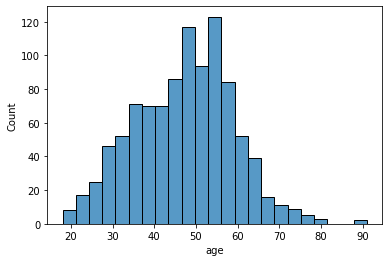

In [23]:
sns.histplot(df['age']);

- Participants are mainly between their 40s and 60s

- People older than 30 are getting the same amount of sleep per night as those in their 20s. My assumption would be that one group would be higher than the other due to either partying or work.

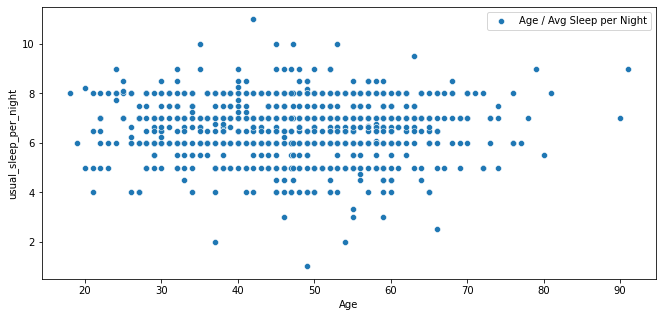

In [43]:
plt.figure(figsize = (11, 5))
sns.scatterplot(x=df['age'], y=df['usual_sleep_per_night'])
plt.xlabel('Age')
plt.legend(labels = ['Age / Avg Sleep per Night']);

- There does not seem to be much correlation between age and usual amount of sleep.

## Income

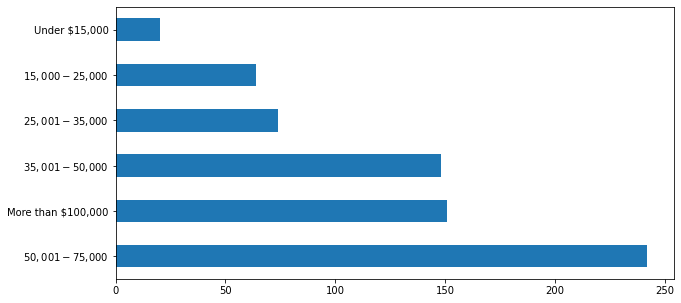

In [25]:
plt.figure(figsize = (10,5))
df['house_hold_income_bracket'].value_counts().plot(kind = 'barh');

<Figure size 2880x2880 with 0 Axes>

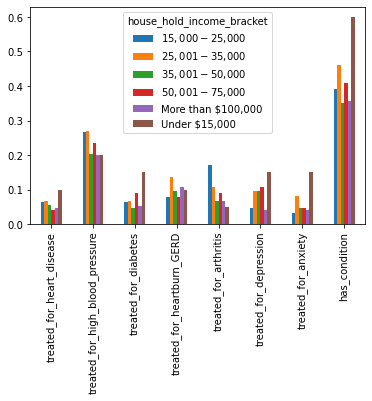

In [26]:
plt.figure(figsize = (40,40))
df.drop(columns = ['length_of_average_nap',
                   'naps_per_month', 'age', 
                   'usual_sleep_per_night',
                   'employment_status',
                   'avg_weekly_hours_worked',
                   'unconvential_awake_time',
                   'snores',
                   'poor_sleep',
                   'overworked']).groupby('house_hold_income_bracket').mean().T.plot(kind='bar');

Participants who make under $15,000 are more likely to have a health condition and also far more likely to be getting poor sleep. They are also more likely to be treated for depression, anxiety and diabetes. 

In [27]:
df['house_hold_income_bracket']

0       $35,001 - $50,000
1       $35,001 - $50,000
2      More than $100,000
3       $35,001 - $50,000
4      More than $100,000
              ...        
995                   NaN
996     $50,001 - $75,000
997     $50,001 - $75,000
998     $35,001 - $50,000
999                   NaN
Name: house_hold_income_bracket, Length: 1000, dtype: object

In [28]:
df.groupby('house_hold_income_bracket').mean()

,usual_sleep_per_night,naps_per_month,length_of_average_nap,employment_status,avg_weekly_hours_worked,snores,treated_for_heart_disease,treated_for_high_blood_pressure,treated_for_diabetes,treated_for_heartburn_GERD,treated_for_arthritis,treated_for_depression,treated_for_anxiety,age,unconvential_awake_time,poor_sleep,has_condition,overworked
house_hold_income_bracket,,,,,,,,,,,,,,,,,,
"$15,000 - $25,000",6.782765,5.156250,47.656250,1.953125,43.750000,2.531250,0.062500,0.265625,0.062500,0.078125,0.171875,0.046875,0.031250,50.113006,0.156250,0.453125,0.390625,0.296875
"$25,001 - $35,000",6.417171,4.040541,41.081081,2.094595,42.351351,1.648649,0.067568,0.270270,0.067568,0.135135,0.108108,0.094595,0.081081,46.797297,0.202703,0.554054,0.459459,0.378378
"$35,001 - $50,000",6.556656,4.229730,34.054054,1.966216,44.310811,1.777027,0.054054,0.202703,0.047297,0.094595,0.067568,0.094595,0.047297,44.692330,0.128378,0.500000,0.351351,0.364865
"$50,001 - $75,000",6.634404,3.206612,33.789256,1.987603,44.256198,2.247934,0.041322,0.235537,0.090909,0.078512,0.090909,0.107438,0.045455,46.286084,0.177686,0.479339,0.409091,0.404959
"More than $100,000",6.802444,3.576159,31.456954,2.019868,45.682119,2.331126,0.046358,0.198675,0.052980,0.105960,0.066225,0.039735,0.039735,45.956721,0.145695,0.417219,0.357616,0.490066
"Under $15,000",6.128016,2.500000,23.500000,2.400000,36.250000,1.600000,0.100000,0.200000,0.150000,0.100000,0.050000,0.150000,0.150000,48.750000,0.100000,0.650000,0.600000,0.100000


Those making more than 100,000 are getting the most sleep, average 6.8 hours per night while those in the lowest range(under 15,000) are sleeping the least with 6.1 hours per night

In [29]:
df[['naps_per_month',
    'length_of_average_nap',
    'snores',
    'poor_sleep',
    'overworked',
    'has_condition',
    'treated_for_anxiety']].groupby('overworked').mean().T

overworked,0,1
naps_per_month,3.721724,3.207675
length_of_average_nap,33.603232,29.345372
snores,1.980251,2.349887
poor_sleep,0.457810,0.498871
has_condition,0.387792,0.347630
treated_for_anxiety,0.052065,0.036117
